# 0.0. Imports

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
%matplotlib inline
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', 100)
plt.rcParams['figure.figsize'] = [25, 12]

# 1.0. Data Collection

In [2]:
df_raw = pd.read_csv('data/train.csv')
df_raw.head()

,ID,WEIGHT,STATUS,FINALDEST,FOOTINGS,LEASE,REGION,PIERS,SECURED,TITLED,SECTIONS,SQFT,BEDROOMS,LOCATION,SHIPMONTH,WGTADJ,CONTROL,PRICE
0,ID_0,-0.71,0.62,-0.38,-0.61,-0.15,-0.70,-0.67,-0.39,-0.63,0.58,-0.32,0.06,-0.89,-0.16,-0.08,-0.16,71000.00
1,ID_1,-0.81,0.62,-0.38,-1.27,-0.89,-1.63,-0.94,-0.91,-0.33,0.58,1.19,0.06,-0.32,0.41,0.53,0.41,9.00
2,ID_2,2.75,0.62,-0.38,-0.61,-0.15,0.22,-0.67,-0.65,-0.63,-1.51,-0.51,0.06,-0.32,0.99,-2.23,0.98,89000.00
3,ID_3,-0.71,-1.21,-0.38,0.06,-0.15,-0.70,-0.67,-0.65,-0.63,0.58,-0.32,0.06,-0.89,0.70,-0.29,0.70,120000.00
4,ID_4,0.74,0.62,-0.38,-0.27,-0.15,0.22,-0.67,-0.65,-0.63,0.58,0.25,0.06,-0.32,0.41,0.53,0.41,100000.00


# 2.0. Data Description

In [3]:
df2 = df_raw.copy()

In [4]:
df2.shape

(3449, 18)

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3449 entries, 0 to 3448
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         3449 non-null   object 
 1   WEIGHT     3449 non-null   float64
 2   STATUS     3449 non-null   float64
 3   FINALDEST  3449 non-null   float64
 4   FOOTINGS   3449 non-null   float64
 5   LEASE      3449 non-null   float64
 6   REGION     3449 non-null   float64
 7   PIERS      3449 non-null   float64
 8   SECURED    3449 non-null   float64
 9   TITLED     3449 non-null   float64
 10  SECTIONS   3449 non-null   float64
 11  SQFT       3449 non-null   float64
 12  BEDROOMS   3449 non-null   float64
 13  LOCATION   3449 non-null   float64
 14  SHIPMONTH  3449 non-null   float64
 15  WGTADJ     3449 non-null   float64
 16  CONTROL    3449 non-null   float64
 17  PRICE      3449 non-null   float64
dtypes: float64(17), object(1)
memory usage: 485.1+ KB


#### Numerical Variables

In [6]:
num_attr = df2.select_dtypes(include=['float64'])

desc_stats = pd.concat([num_attr.describe(), pd.DataFrame([num_attr.skew(), num_attr.kurtosis()], index=['skew', 'kurtosis'])], axis=0).T
desc_stats

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
WEIGHT,3449.00,-0.01,0.99,-1.10,-0.71,-0.50,0.63,3.02,1.47,1.45
STATUS,3449.00,-0.01,0.99,-1.21,-1.21,0.62,0.62,2.46,-0.03,-0.82
FINALDEST,3449.00,-0.02,0.95,-0.38,-0.38,-0.38,0.28,4.89,4.51,20.55
FOOTINGS,3449.00,-0.01,1.00,-1.27,-0.61,-0.61,1.38,1.38,0.49,-1.39
LEASE,3449.00,-0.02,0.95,-0.89,-0.15,-0.15,-0.15,5.03,4.96,23.82
REGION,3449.00,-0.01,1.00,-1.63,-0.70,0.22,1.14,2.07,0.04,-0.72
PIERS,3449.00,-0.01,1.00,-0.94,-0.67,-0.67,1.43,1.43,0.69,-1.41
SECURED,3449.00,-0.01,1.00,-0.91,-0.65,-0.65,1.44,1.44,0.73,-1.39
TITLED,3449.00,-0.01,1.00,-0.92,-0.63,-0.63,1.44,1.44,0.74,-1.38
SECTIONS,3449.00,-0.00,1.00,-1.51,-1.51,0.58,0.58,2.68,-0.63,-0.72


# 3.0. Exploratory Data Analysis

In [7]:
df3 = df2.copy()

### 3.1. Univariate Analysis

#### Target Variable

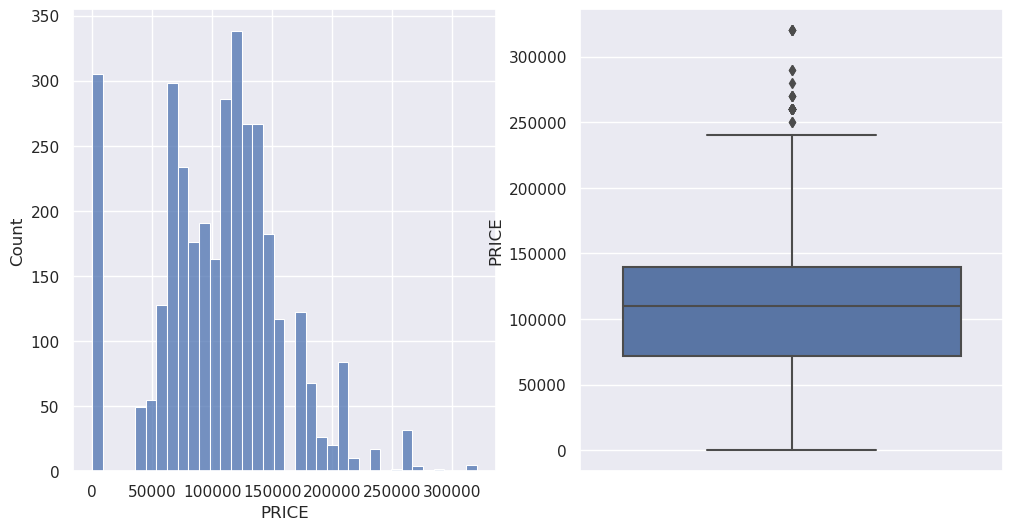

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.histplot(x='PRICE', data=df3, ax=ax[0]);

sns.boxplot(y='PRICE', data=df3, ax=ax[1]);

#### Numerical Variables

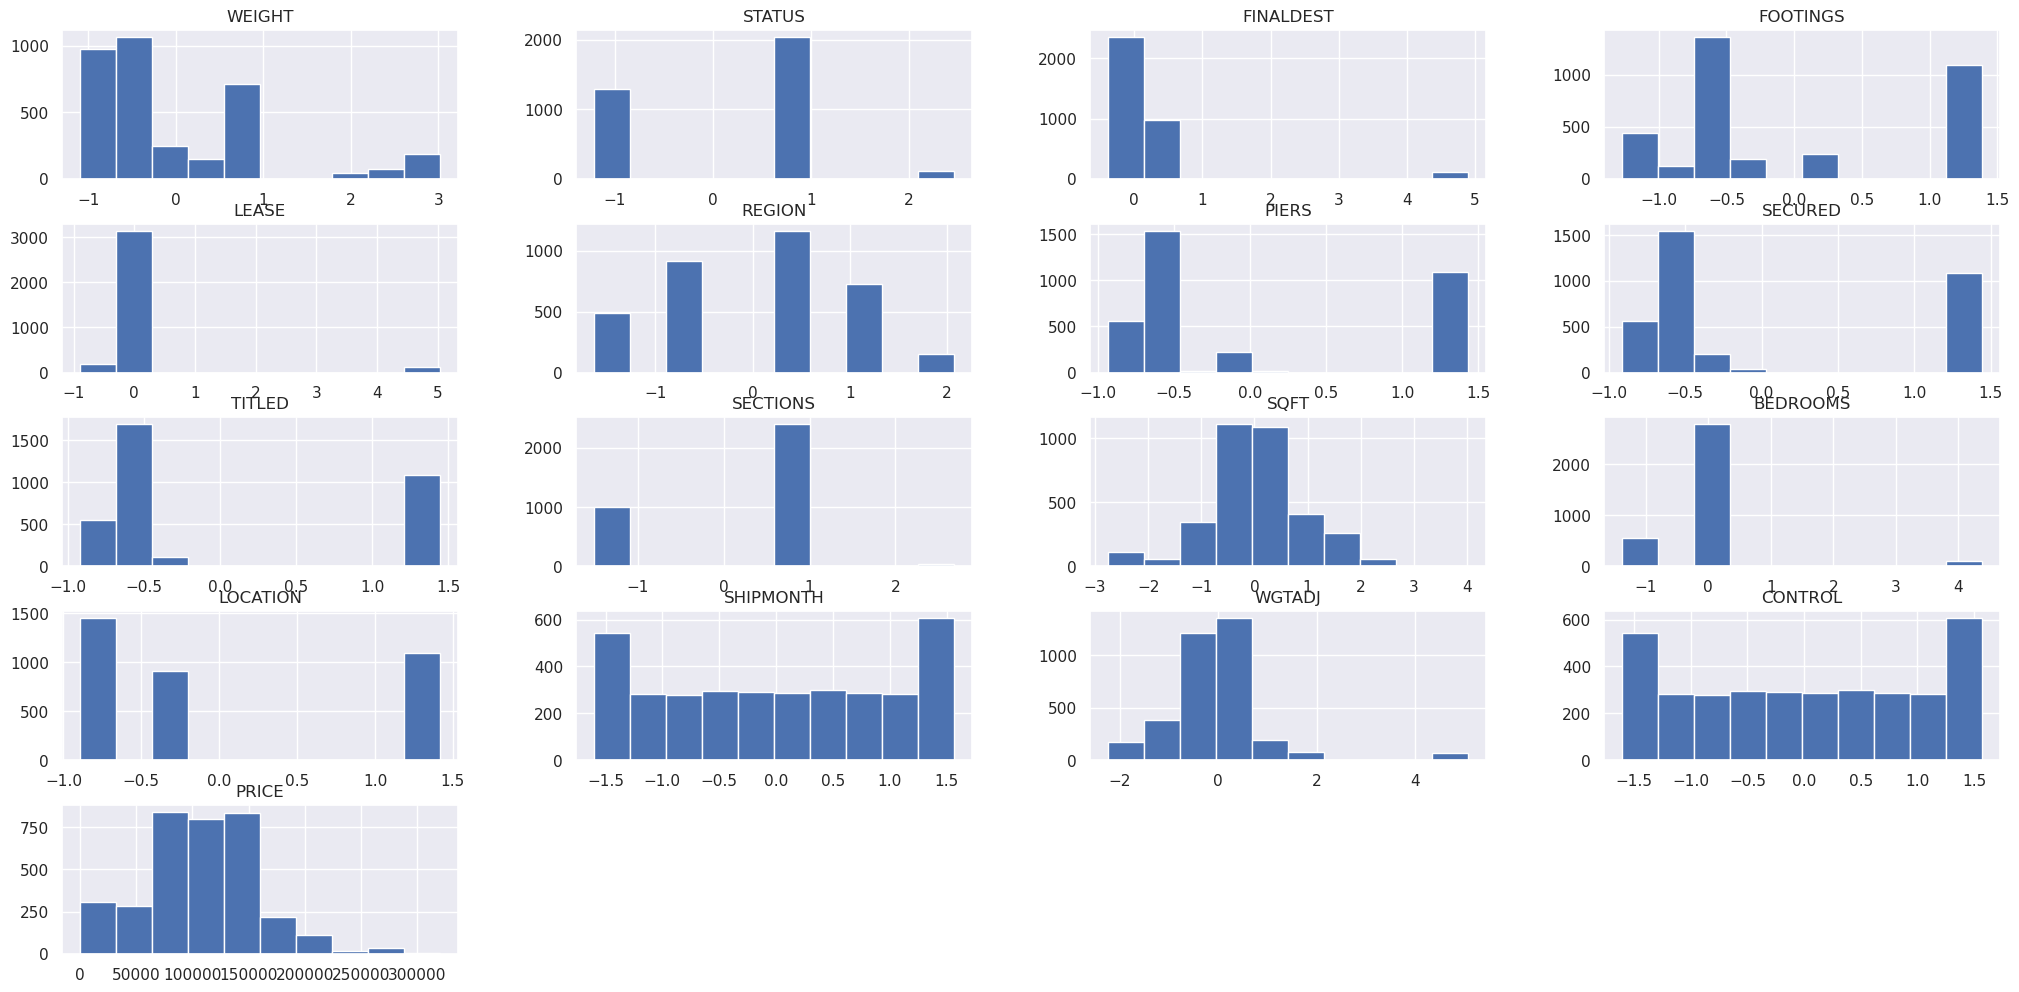

In [39]:
df3.hist();

In [41]:
cat_cols = []

for col in df3.columns.values:    
    if df3[col].nunique() < 25:
        cat_cols.append(col)
        print(f'{col}: {df3[col].nunique()}')

STATUS: 3
FINALDEST: 3
FOOTINGS: 6
LEASE: 3
REGION: 5
PIERS: 6
SECURED: 5
TITLED: 4
SECTIONS: 3
BEDROOMS: 3
LOCATION: 3
SHIPMONTH: 12
WGTADJ: 24


In [42]:
for col in cat_cols:
    df3[col] = df3[col].astype('object')

In [43]:
df3.dtypes

ID            object
WEIGHT       float64
STATUS        object
FINALDEST     object
FOOTINGS      object
LEASE         object
REGION        object
PIERS         object
SECURED       object
TITLED        object
SECTIONS      object
SQFT         float64
BEDROOMS      object
LOCATION      object
SHIPMONTH     object
WGTADJ        object
CONTROL      float64
PRICE        float64
dtype: object

## 3.2. Bivariate Analysis

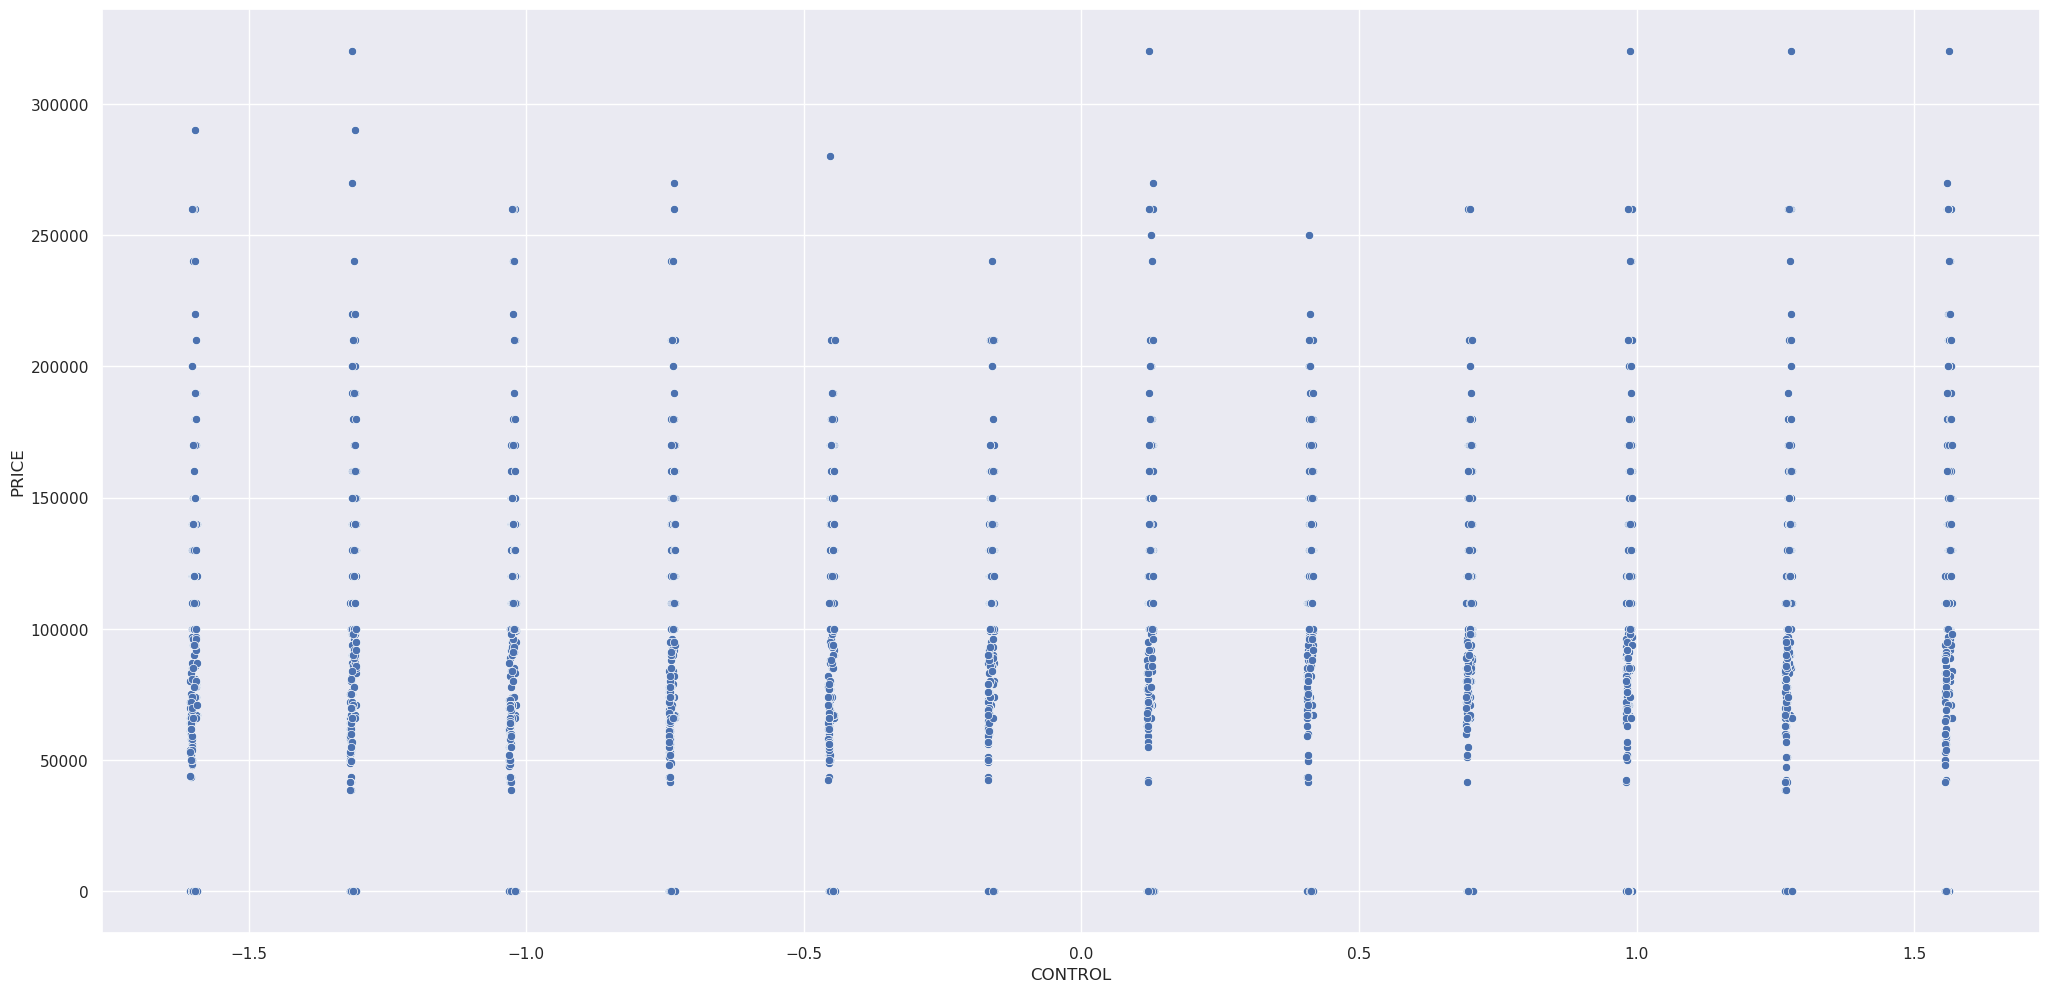

In [47]:
sns.scatterplot(x='CONTROL', y='PRICE', data=df3);